In [10]:
import pandas as pd
import numpy as np
import magic
from matplotlib import pyplot as plt
import importlib
%matplotlib inline
importlib.reload(magic)
import seaborn as sns

In [2]:
csv_file = 'historical_3.csv'

In [ ]:
maps = {
    'sample.json' : 2,
    'Sierpinski-triangle.json' : 3,
    'randomSparse.json' : 4,
    'lambda.json' : 4,
    'circle.json' : 4,
    'randomMedium.json' : 4,
    'boston-sparse.json' : 8,
    'tube.json' : 8,
    'edinburgh-sparse.json' : 16,
    'oxford-sparse.json' : 16,
    'gothenburg-sparse.json' : 16,
}

In [4]:
runner = magic.Fluent()
(runner
     .create_historical_players(4)
     .battles_on_map('gothenburg-sparse.json', 16, 30)
     .battles_on_map('gothenburg-sparse.json', 12, 30)
     .battles_on_map('gothenburg-sparse.json', 8, 30)
     .battles_on_map('edinburgh-sparse.json', 16, 30)
     .battles_on_map('edinburgh-sparse.json', 12, 30)
     .battles_on_map('edinburgh-sparse.json', 8, 30)
     .battles_on_map('boston-sparse.json',8,30)
     .battles_on_map('boston-sparse.json',6,30)
     .battles_on_map('boston-sparse.json',4,30)
     .battles_on_map('boston-sparse.json',2,30)
     .battles_on_map('tube.json',8,30)
     .battles_on_map('tube.json',6,30)
     .battles_on_map('tube.json',4,30)
     .battles_on_map('tube.json',2,30)
     .experiment('Historical')
     .run().dump().store_pointwise(csv_file)
)

sending 419                                 


In [16]:

data = pd.read_csv(csv_file, index_col=False)

data['tournament'] = data.tournament_scores/data.num_players
data['effectiveness'] = np.log(data.scores+1)/np.log(data.map_rivers_count/data.num_players)


D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


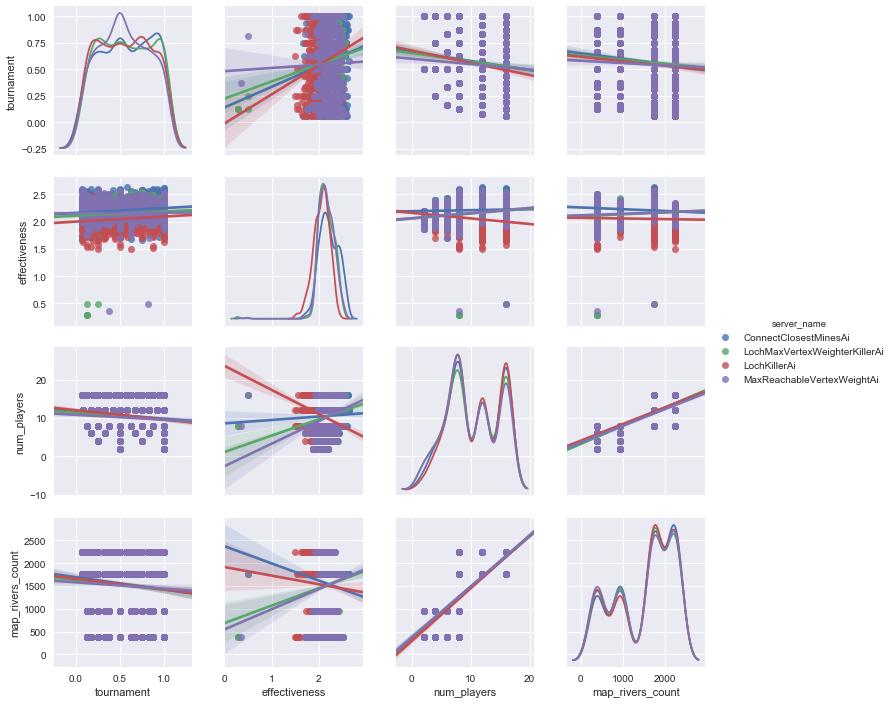

In [26]:
sns.pairplot(
    data,
    vars=['tournament','effectiveness','num_players','map_rivers_count'],
    hue='server_name',
    kind='reg',
    diag_kind='kde',
    plot_kws={ 'scatter_kws' : {'alpha' : 0.8}})

In [7]:
winners = (data
 .groupby(['num_players','map_rivers_count','server_name'])
 .mean()
 .loc[:,'tournament']
 .reset_index()
 .groupby(['num_players','map_rivers_count'])
 .apply(lambda x : x.sort_values('tournament',ascending=False).iloc[0]['server_name'])
 .to_frame('winner')
     .reset_index()
 )


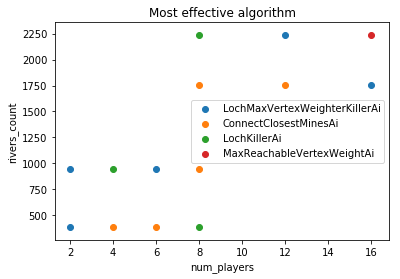

In [8]:
for winner in winners.winner.unique():
    s = winners.loc[winners.winner == winner]
    plt.scatter(
        s.num_players,
        s.map_rivers_count,
        label = winner
    )
plt.legend()
plt.xlabel('num_players')
plt.ylabel('rivers_count')
plt.title('Most effective algorithm')